<a href="https://colab.research.google.com/github/NihilisticMotif/Data-Science-Documentation/blob/main/Data-Science-Documentation/ML_Algorithm/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###To Do Now

**Logistic regression**
1. Implement Gradient Descent for logistic regression
2. Evaluate the accuracy of the logistic regression algorithm

**Linear Regression**
1. Linear Regression with multiple degrees
2. Optimize linear regression without gradient descent
3. Evaluate the accuracy of linear regression without r-square

**KaggleProject01_BostonHousing_by_TOLGAHANCEPEL.ipynb**
1. **CorrelationBetweenVariables.ipynb:** Explain how `df.corr` work?
2. **CrossValidation.ipynb:** Explain about this (https://www.kaggle.com/code/alexisbcook/cross-validation)
3. continue the project

**MissingValue.ipynb:** 
1. How to diagnose the missing data mechanism?
2. How to deal with missing value?

#Getting Data

###[Step 1]: Import library and data set

In [1]:
!pip install --upgrade -q gspread

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 KB 1.9 MB/s eta 0:00:00


In [2]:
# [1.] import library

from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 

# [2.] Connect Google Collab with Google Sheet
from google.colab import auth
import gspread
from google.auth import default
from google.colab import data_table

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('student-mat').get_worksheet(0)
rows = worksheet.get_all_values()
dfmain = pd.DataFrame(rows)

# [3.] Display Data form Google Sheet
dfmain.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15


###[Step 2]: clean data set

In [3]:
# [1.] Get string from the first row of every columns
# reference: https://www.easytweaks.com/get-first-row-pandas-dataframe/
ColumnName = dfmain.iloc[0].to_list()

# [2.] Rename every column
for i in range(len(ColumnName)):
  dfmain.rename(columns={i:ColumnName[i]},inplace=True)

# [3.] Drop first row
dfmain=dfmain.drop([0], axis=0)

# [4.] Change Data Type
# reference: https://www.geeksforgeeks.org/change-data-type-for-one-or-more-columns-in-pandas-dataframe/
# reference: https://statisticsglobe.com/convert-string-boolean-pandas-dataframe-column-python
# reference: https://sparkbyexamples.com/pandas/pandas-convert-column-to-numpy-array/
# reference: https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html
# reference: https://stackoverflow.com/questions/2468334/creating-dynamic-and-expandable-dictionaries-in-python
# reference: https://favtutor.com/blogs/merge-dictionaries-python
# reference: https://datagy.io/python-int-to-binary/

# VectorName is used for indicate the meaning of the vector in each categorized data based column
# VectorName = [[ColumnIndex,ColumnDict],...,[ColumnIndex,ColumnDict]]
VectorName=[]

# BinaryVector(lengh) is a function that is used for generate vector
def BinaryVector(lengh):
  mathbbR = math.ceil(math.log2(lengh))
  categorization = []
  for element in range(lengh):
    binary = str(bin(element)).split('b')[1]
    vector = []
    for k in range(mathbbR-len(binary)):
      vector.append(0)
    for i in binary:
      vector.append(int(i))
    categorization.append(vector)
  categorization=np.array(categorization)
  return categorization

# Change the data type of every column in dfmain
for i in range(len(ColumnName)):
  IsD=np.array(dfmain[ColumnName[i]])[0]
  if IsD.isdigit():
    # Change data type from String into Integer
    dfmain[ColumnName[i]]=dfmain[ColumnName[i]].apply(pd.to_numeric)
  else:
    # Change data type from String into Vector that contains 0 and 1
    dfColumn = dfmain[ColumnName[i]].to_numpy()
    ListValue=list(np.sort(pd.Series(np.array(dfColumn)).value_counts().index.to_numpy()))
    # Create Binary Vecotr Dictionary
    Convert = { "data":[]}
    Category=BinaryVector(len(ListValue))
    for j in range(len(ListValue)):
      ConvertData = {}
      ConvertData[ListValue[j]] = Category[j]
      Convert["data"].append(ConvertData)
    for k in range(len(Convert['data'])):
      if (k!=0):
        Convert['data'][k].update(Convert['data'][k-1])
      else:
        continue
    # Update the dfmain and VectorName
    VectorName.append([i,Convert['data'][-1]])
    dfmain[ColumnName[i]] = dfmain[ColumnName[i]].map(dict(Convert['data'][-1]))

In [4]:
dfmain.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,[0],[0],18,[1],[0],[0],4,4,"[0, 0, 0]","[1, 0, 0]",...,4,3,4,1,1,3,6,5,6,6
2,[0],[0],17,[1],[0],[1],1,1,"[0, 0, 0]","[0, 1, 0]",...,5,3,3,1,1,3,4,5,5,6
3,[0],[0],15,[1],[1],[1],1,1,"[0, 0, 0]","[0, 1, 0]",...,4,3,2,2,3,3,10,7,8,10
4,[0],[0],15,[1],[0],[1],4,2,"[0, 0, 1]","[0, 1, 1]",...,3,2,2,1,1,5,2,15,14,15
5,[0],[0],16,[1],[0],[1],3,3,"[0, 1, 0]","[0, 1, 0]",...,4,3,2,1,2,5,4,6,10,10


In [5]:
CategorizingColumn=[]
for i in VectorName:
  CategorizingColumn.append(i[0])
#print([VectorName[-1][0]])
#print(ColumnName[VectorName[-1][0]])

ColumnDis=[]
ColumnCon=[]

for i in range(len(ColumnName)):
  if i in CategorizingColumn:
    ColumnDis.append(ColumnName[i])
  else:
    ColumnCon.append(ColumnName[i])

In [6]:
idx1 = pd.Index([31, 2, 3, 4])
idx2 = pd.Index([31,12, 2,4, 5, 6])
idx1.intersection(idx2)

Int64Index([31, 2, 4], dtype='int64')

In [7]:
# [5.] Create multiples copy of a data frame, in order to display different types of logistic regression.

# df = data frame
# Col = Column
# B = binary
# M = multinomial
# O = ordinal
# Con = float = continue
# Dis = integer = discrete
# Te = evaluating data
# Tr = training data
# X = input
# Y = Output

# [5.A] Binary Logistic regression with continue input

BConX=[ColumnCon[4]]
BConY=[ColumnDis[-3]]

dfBCon=dfmain.loc[:, dfmain.columns.intersection([BConX[0],BConY[0]])]

# [5.B] Binary Logistic regression with discrete input

BDisX=[ColumnDis[0]]
BDisY=[ColumnDis[-3]]

dfBDis=dfmain.loc[:, dfmain.columns.intersection([BDisX[0],BDisY[0]])]

#dfBint=dfmain

###[Step 3]: separate training data set from evaluating data set

In [8]:
# Separate training and evaluating data in order to evaluate how well the algorithm predict data out side its data set.

def SeparateData(data,Ratio,nameY):

  DataRatio = int(data.shape[0]*Ratio)
  Data=data.sample(frac = 1)
  TrainD= Data.iloc[:DataRatio]
  TesttD= Data.iloc[DataRatio:]

  TrainX=TrainD.drop(nameY, axis=1)
  TrainY=TrainD[nameY]
  TesttX=TesttD.drop(nameY, axis=1)
  TesttY=TesttD[nameY]

  #print('TrainX')
  #print(TrainX)
  #print('TesttX')
  #print(TesttX)

  return [TrainX,TrainY,TesttX,TesttY]

# df = data frame
# Col = Column
# X = input
# Y = Output
# Te = evaluating data
# Tr = training data
# 1f = for single feature linear regression
# mf = for multiple features linear regression

# Data A
DaDBCon=SeparateData(dfBCon,0.75,BConY[0])
TrXBCon=DaDBCon[0]
TrYBCon=DaDBCon[1]
TeXBCon=DaDBCon[2]
TeYBCon=DaDBCon[3]

# Data B
DaDBDis=SeparateData(dfBDis,0.75,BDisY[0])
TrXBDis=DaDBDis[0]
TrYBDis=DaDBDis[1]
TeXBDis=DaDBDis[2]
TeYBDis=DaDBDis[3]


'''
TrX=TrX1f
TrY=TrY1f
TeX=TeX1f
TeX=TeY1f
'''

'''
DaDmf=SeparateData(dfmf,0.75,ColY1f)
TrXmf=DaDmf[0]
TrYmf=DaDmf[1]
TeXmf=DaDmf[2]
TeYmf=DaDmf[3]
'''

'\nDaDmf=SeparateData(dfmf,0.75,ColY1f)\nTrXmf=DaDmf[0]\nTrYmf=DaDmf[1]\nTeXmf=DaDmf[2]\nTeYmf=DaDmf[3]\n'

#Introduction of Logistic Regression

###Introduction of Logistic Regression

**What is Logistic Regression?**

Logistic regression is a supervised learning algorithm used to predict a dependent categorical target variable. In essence, if you have a large set of data that you want to categorize, logistic regression may be able to help. (https://www.mastersindatascience.org/learning/machine-learning-algorithms/logistic-regression/)

**Type of Logistic Regression**
1. Binary logistic regression
* This algorithm compute the input $X$ into output $y$, where $y$ only means true or false.
* $y\in \{0,1\}$
* e.g. Is this picture has a dog? etc.
2. Multinomial logistic regression
* e.g.
* Classifying texts into what language they come from.
* Predicting whether a student will go to college, trade school or into the workforce.
* Does your cat prefer wet food, dry food or human food?
* etc.
3. Ordinal logistic regression
* Ordinal logistic regression is also a model where there are multiple classes that an item can be classified as; however, in this case an ordering of classes is required. Classes do not need to be proportionate. The distance between each class can vary.
* e.g. Movies Rate etc.

reference: https://www.mastersindatascience.org/learning/machine-learning-algorithms/logistic-regression/

**Why we do not use linear regression in this case?**

Linear Regression can only be used for predicting the relationship between continuous variable.

This algorithm is not good for classification task because
* In this case, output data can be classify into 2 values $\{0,1\}$, the linear regression algorithmn do not predict output data accuratly at all.
* In theory, $h(x)$ should be $0\leq h(x)\leq 1$ for boolean classification problem.

**What I will do in this tutorial?**
* I will demonstrate how to use Logistic Regression to predict the relationship between continue $x$ variable and discrete $y$ variable.

**Step**
1. Creating Hypothesis Function
2. Creating Evaluating Function
3. Creating Optimization Function
4. Evaluate the accuracy of the model

**Note**
* Both linear regression and logistic regression are linear model.

###Linear Algebra Notation

**Linear algebra notation**

**Vector Space**

Vector Space = a space comprised of vectors, collectively with the associative and commutative law of addition of vectors and also the associative and distributive process of multiplication of vectors by scalars is called vector space. (https://byjus.com/maths/vector-space/)
1. $\vec{a_m}+\vec{b_m}=\vec{b_m}+\vec{a_m}\in\mathbb{R^m}$
2. $c\vec{v_m}=\vec{v_m}c\in\mathbb{R^m}$

**Vector Space Notation**

* $a\in\mathbb{R}$
* $\vec{a}_m\in\mathbb{R^m}$
* $A_{m\times n}\in\mathbb{R^{m\times n}}$
* $1_{m\times n}\in\mathbb{R^{m\times n}}=$ matrix that have only $1$ as its elements.
* $a^{\{n\}}=a$ no. $n$ which is $\in\mathbb{R}$
* $\vec{a}_m^{\{n\}}=$ vector $a$ no. $n$ which is $\in\mathbb{R^m}$
* $a^n=\Pi_{i=1}^n a$
* $\vec{a}_m^n=\Pi_{i=1}^n\vec{a}_m$

**Transpose**
* $A_{m\times n}\implies A^T_{n\times m}$

**Dot product**

* $\vec{a_n}\cdot\vec{b_n}=\sum_{i=1}^na^{\{i\}}b^{\{i\}}$

**Matrix Multiplication**

$R_{n\times m}\cdot C_{m\times q}=P_{n\times q}$

$\vec{r_m}^{\{i\leq n\}}\cdot\vec{c_m}^{\{j\leq q\}}=p^{\{i\leq n, j\leq q\}}$

* $\vec{r_m}^{\{i\leq n\}}=$ row vector of matrix $R_{n\times m}$ no.$i$
* $\vec{c_m}^{\{j\leq q\}}=$ column vector of matrix $C_{m\times q}$ no.$j$
* $i,j\in\mathbb{Z}$
* $i\in[1,n]$
* $j\in[1,p]$

reference: https://www.mathsisfun.com/algebra/matrix-multiplying.html

#Binary Logistic Regression

###[Step 1]: Creating Hypothesis Function and define variables

**Here are the initial variable**

In [9]:
ColX=BConX[0]
ColY=BConY[0]
df=dfBCon
TrX=TrXBCon
TrY=TrYBCon
TeX=TeXBCon
TeY=TeYBCon

Note:
* $\theta =\vec{h}$
* Personally, I like $\vec{h}$ than $\theta$ because it makes me realize that $\vec{h}$ is a vector.

**Hypothesis Function**

* $h(\vec{x}_n)=\frac{1}{1 + \exp({-\vec{h_n}\cdot\vec{x_n}-h^{\{0\}}})}=$ Probability $\in[0,1]$
* $\exp(c)=e^c$
* $\vec{h_n}=$ coefficient of hypothesis function
* $h^{\{0\}}=$ intercept of hypothesis function
* $n=$ number of all features

**Hypothesis Function in $\mathbb{R^{n+1}}$ form**

* $h(\vec{x}_{n+1})=\frac{1}{1 + \exp({-\vec{h}_{n+1}\cdot\vec{x}_{n+1}})}=$ Probability $\in[0,1]$
* $x^{\{0\}}=1$

**Note: In this case**
* $h(\vec{x})=\frac{1}{1 + \exp(-(x^{\{1\}}*h^{\{1\}}+h^{\{0\}}))}$
* $h(x^{\{1\}})=$ The probability that the student have Higher_Education (Output)
* $x^{\{1\}}$ = Grade score of the student (Input)

**Output of $h(x)$:**
* $\vec{h}_{n+1}\cdot\vec{x}_{n+1}\geq0\implies h(\vec{x}_{n+1})=\frac{1}{1 + \exp(-|\vec{h}_{n+1}\cdot\vec{x}_{n+1}|)}\geq0.5\implies y=1$
* $\vec{h}_{n+1}\cdot\vec{x}_{n+1}<0\implies h(\vec{x}_{n+1})=\frac{1}{1 + \exp(|\vec{h}_{n+1}\cdot\vec{x}_{n+1}|)}<0.5\implies y=0$

**Hypothesis function that predicts all data from each row.**

$h_m(X_{m\times n+1})=\frac{\vec{1}_m}{\vec{1}_m+\exp(X_{m\times n+1}\cdot\vec{h}_{n+1})}$
* $\vec{X}_{n+1}^{\{0\}}=\vec{1}_{n+1}$
* $m=$ number of all rows of the data frame

**Here is the Python implementation**

In [10]:
def HypothesisFunction(x1,h0,h1):
  return 1/(1+np.exp(-(x1*h1+h0)))

**Q: Why using $e$?**

A: For mathematical simplicity and convenience.
* $e^x=\exp(x)$
* $\frac{d}{dx}[e^x]=e^x$

reference: 
* https://www.quora.com/Why-is-logistic-regression-based-on-the-exponential-function-Where-did-the-exponential-function-come-from-anyway
* https://stats.stackexchange.com/questions/338702/why-do-we-use-the-natural-exponential-in-logistic-regression

###[Step 2]: Creating Evaluation Function

Keyword
* Evaluation Function = Cost Function
* Square Error Function = Evaluation Function of Linear Regression = Cost Function of Linear Regression

**Evaluating Function No.1**

$J(\vec{h_{n+1}})=\frac{1}{m}\Sigma_{i=1}^m C(h(\vec{x_n}^{\{i\}}),y^{\{i\}})$

* $y=1\implies C(h(\vec{x_n}^{\{i\}}),1)=-\ln(h(\vec{x}_n))$
* $y=0\implies C(h(\vec{x_n}^{\{i\}}),0)=-\ln(1-h(\vec{x}))$

**Evaluating Function No.2**

$J(\vec{h}_{n+1})=-\frac{1}{m}\Sigma_{i=1}^m[y^{\{i\}}*\ln(h(\vec{x_{n+1}}^{\{i\}}))+(1-y^{\{i\}})\ln(\vec{1}_{n+1}-h(\vec{x_{n+1}}^{\{i\}}))]$

* $y=1\implies J(\vec{h}))=-\frac{1}{m}\Sigma_{i=1}^m[\ln(h(\vec{x_{n+1}}^{\{i\}}))+0]$
* $y=0\implies J(\vec{h}))=-\frac{1}{m}\Sigma_{i=1}^m[0+\ln(1-h(\vec{x_{n+1}}^{\{i\}}))]$

**Evaluating Function No.3**

$J(\vec{h}_{n+1})=-\frac{1}{m}\,\,(\vec{y}_m\cdot\ln(h_m(X_{m\times n+1}))+(\vec{1}_m-\vec{y}_m)\cdot\ln(\vec{1}_m-h_m(X_{m\times n+1})))$

* $h_m(X_{m\times n+1})=\frac{\vec{1}_m}{\vec{1}_m+\exp(X_{m\times n+1}\cdot\vec{h}_{n+1})}$
* $m=$ number of all training data samples

**Evaluating Function No.4**

$J(\vec{h}_{n+1})=-\frac{1}{m}\,\,(\vec{y}_m\cdot\ln(\frac{\vec{1}_m}{\vec{1}_m+\exp(X_{m\times n+1}\cdot\vec{h}_{n+1})})+(\vec{1}_m-\vec{y}_m)\cdot\ln(\vec{1}_m-\frac{\vec{1}_m}{\vec{1}_m+\exp(X_{m\times n+1}\cdot\vec{h}_{n+1})}))$

**Here is the Python implementation**

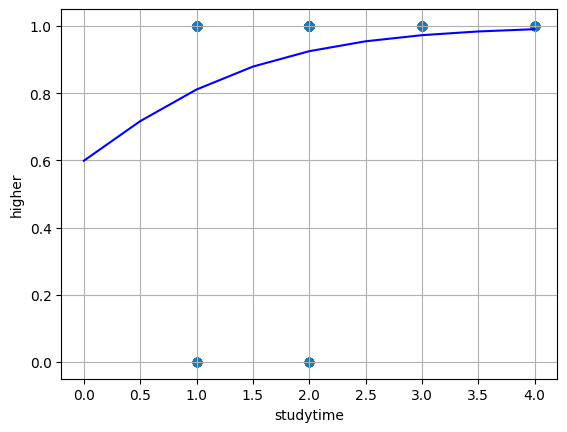

[0.19522913]


In [11]:
def HypothesisFunction(x1,h0,h1):
  return 1/(1+np.exp(-(x1*h1+h0)))

# 1/(1+np.exp(-(xline*2-3)))

def EvaluationFunction(data,ind_x,ind_y,h0=0,h1=0):
  num=0
  for i in range(data.shape[0]):
    num-=data.iat[i,ind_y]*np.emath.log(HypothesisFunction(data.iat[i,ind_x],h0,h1))+(1-data.iat[i,ind_y])*np.emath.log(1-HypothesisFunction(data.iat[i,ind_x],h0,h1))
  num*=(1/data.shape[0])
  return num

# Here is the data.
# How do I enforce a square grid in matplotlib? reference: https://stackoverflow.com/questions/50158333/how-do-i-enforce-a-square-grid-in-matplotlib
plt.grid()

# Add labels to the x- and y-axis.
plt.xlabel(ColX)
plt.ylabel(ColY)

# Data is plotted.
plt.scatter(df[ColX], df[ColY])

# Here is the hypothesis function a.k.a. prediction function.
Hi=[0.4,1.055]
xline = np.arange(0, 4.1,0.5)
yline = HypothesisFunction(xline,Hi[0],Hi[1])
plt.plot(xline, yline, color='blue')

plt.show()

print(EvaluationFunction(df,0,1,h0=Hi[0],h1=Hi[1]))

**Q: Why doing this? $y=1\implies\ln(h(\vec{x}))$ and $y=0\implies\ln(1-h(\vec{x}))$**

A: 

According to Logarithm: $a^b=c\implies\log_a(c)=b$

$\therefore a^0=1\implies\log_a(1)=0\implies\lim_{c\to1}\log_a(c)=0$

Given that:
* $h(\vec{x})\in[0,1]$
* $h(\vec{x})\geq0.5\implies y=1\implies \ln(h(\vec{x}))\to0$
* $h(\vec{x})<0.5\implies y=0\implies \ln(1-h(\vec{x}))\to0$

**Q: Why we do not use square error function? Why $J(\vec{h})\neq\frac{1}{2m}\sum_{i=1}^m(h(x^{\{i\}})-y^{\{i\}})^2$?**

A: $\frac{1}{2m}\sum_{i=1}^m(h(x^{\{i\}})-y^{\{i\}})^2$ is not suitable with logistic regression because the value of $y$ is not continueous. If the square error function is ploted on nD cartesian plane. Then, the function will display multiple local minimums, which interrupt gradient descent from finding the global minimum.

**Q: Why $-(...)$?**

A: 

Given that:
* $h(\vec{x})\in[0,1]$

According to Logarithm: $a^b=c\implies\log_a(c)=b$

$0<a^b=c\leq1\implies \log_a(c)=b\leq0$

$\therefore \frac{1}{m}\Sigma_{i=1}^m[y_i*\log(h(\vec{x}))+(1-y_i)\log(1-h(\vec{x}))]\leq0$

For make things easier, $\frac{1}{m}\Sigma_{i=1}^m[y_i*\log(h(\vec{x}))+(1-y_i)\log(1-h(\vec{x}))]*-1\geq0$

**Q: Why $\ln(x)$?**

A: For mathematical simplicity

* $\frac{d}{dx}[\ln(x)]=\frac1x$

/usr/local/lib/python3.9/dist-packages/numpy/lib/scimath.py:287: RuntimeWarning: divide by zero encountered in log
  return nx.log(x)
<ipython-input-12-0328ff482849>:15: RuntimeWarning: invalid value encountered in multiply
  num-=data.iat[i,ind_y]*np.emath.log(HypothesisFunction(data.iat[i,ind_x],h0,h1))+(1-data.iat[i,ind_y])*np.emath.log(1-HypothesisFunction(data.iat[i,ind_x],h0,h1))


Is not a Number=36225
Is a Number=53775


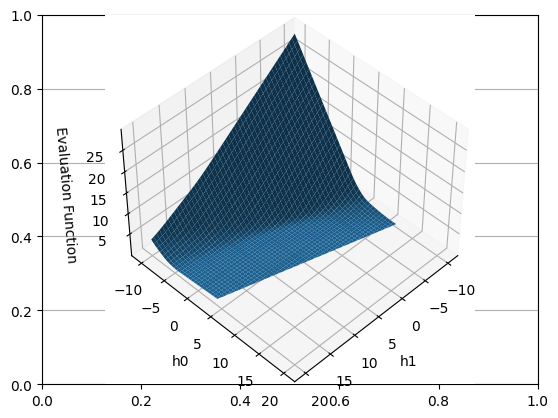

In [12]:
import math
from mpl_toolkits import mplot3d
from matplotlib.pyplot import figure

# Here is the data.
# How do I enforce a square grid in matplotlib? reference: https://stackoverflow.com/questions/50158333/how-do-i-enforce-a-square-grid-in-matplotlib
plt.grid()

def HypothesisFunction(x1,h0,h1):
  return 1/(1+np.exp(-(x1*h1+h0)))

def EvaluationFunction(data,ind_x,ind_y,h0=0,h1=0):
  num=0
  for i in range(data.shape[0]):
    num-=data.iat[i,ind_y]*np.emath.log(HypothesisFunction(data.iat[i,ind_x],h0,h1))+(1-data.iat[i,ind_y])*np.emath.log(1-HypothesisFunction(data.iat[i,ind_x],h0,h1))
  num*=(1/data.shape[0])
  return num
'''
# This is the evaluation function of linear regression
def LineR_Evaluation_1f(data,ind_x,ind_y,h0=0,h1=0):#m,c):
    # size of training data = dfM.shape[0]
    # x_i = dfM.iat[i,0]
    # y_i = dfM.iat[i,1]
    sigma =0
    for i in range(data.shape[0]):
      sigma +=pow((data.iat[i,ind_x]*h0+h1-data.iat[i,ind_y]),2)
    return (1/(2*data.shape[0]))*sigma'''

N = 300
M = 300

x_values = np.linspace(-10, 20, N)
y_values = np.linspace(-10, 20, M)

X, Y = np.meshgrid(x_values, y_values)
Z = EvaluationFunction(df,0,1,h0=X,h1=Y)
#Z = LineR_Evaluation_1f(df,0,1,h0=X,h1=Y)

# Plotting 3D Data.
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z);

ax.set_xlabel('h1')
ax.set_ylabel('h0')
ax.set_zlabel('Evaluation Function')
ax.view_init(45,45);

def countNaN(arr):
  isnan=0
  isnum=0
  for i in arr:
    for j in i:
      if math.isnan(j)==True:
        isnan+=1
      else:
        isnum+=1
  print('Is not a Number='+str(isnan))
  print('Is a Number='+str(isnum))
countNaN(Z)
# IsNan=6097
# IsNum=3903

**Why graph show only half of a function?**

Note that:
* $a\in\mathbb{R}, \log_a(0)=$ Undefined
* $\lim_{h\to0}\log_a(h)=$ Undefined because there are no values to the left of 0 in the domain of $\log_a(h)$ (reference: https://www.mathway.com/Calculus)


###[Step 3]: Create Optimization Function using Gradient Descent

**[1.] Gradient descent of logistic repression**

Gradient descent is an optimization algorithm which is used for minimizing error value of the evaluation function

$\vec{h}_n:=\vec{h}_n-a*\frac{\partial}{\partial \vec{h}_n}J_n(\vec{h}_n)$

$h^{\{0\}}:=h^{\{0\}}-a*\frac{\partial}{\partial h^{\{0\}}}J(h^{\{0\}})$

* $a=$ learning rate
* $J_n()=$ Evaluation Function
* $n=$ number of all features
* $h^{\{0\}}=$ intercept

**[2.] Find $\frac{\partial}{\partial \vec{h}_{n+1}}[h(\vec{h}_n,h^{\{0\}})]=\frac{\partial}{\partial \vec{h}_{n+1}}[\frac{1}{1+\exp(-\vec{x_n}\cdot\vec{h_n}-h^{\{0\}})}]$**

$h(\vec{h_n},h^{\{0\}})=\frac{1}{1+\exp(-\vec{x_n}\cdot\vec{h_n}-h^{\{0\}})}=\frac{1}{1+\exp(-\vec{x}_{n+1}\cdot{\vec{h}_{n+1}})}, x^{\{0\}}=1$

Given that:
$\begin{bmatrix}f(h)=h^{-1}&\,& f'(x)=-h^{-2} &\,& f'(...)=-(1+\exp(-\vec{x}_{+1}\cdot\vec{h}_{n+1}))^{-2}\\g_1(h)=h+1&\,& g_1'(h)=1 &\,& g_1'(...)=1\\g_2(h)=\exp(h)&\,& g_2'(h)=\exp(h) &\,& g_2'(...)=\exp(-\vec{x}_{n+1}\cdot\vec{h_{n+1}})\\g_3(h)=-xh-c&\,& g_3'(h)=-x &\,& g_3'(...)=-\vec{x}_{n+1}\end{bmatrix}$

According to Chain Rule: $\frac{d}{dx}[f(g(x))] = (f\circ g)'= f'(g(x))*g'(x)$

$\therefore\frac{\partial}{\partial \vec{h}_{n+1}}[\frac{1}{1+\exp(-\vec{x_n}\cdot\vec{h_n}+h^{\{0\}})}]=f'(...)g_1'(...)g_2'(...)g_3'(...)$

$\frac{\partial}{\partial \vec{h}_{n+1}}[\frac{1}{1+\exp(-\vec{x_n}\cdot\vec{h_n}+h^{\{0\}})}]=-(1+\exp(-\vec{x}_{n+1}\cdot\vec{h}_{n+1}))^{-2}\exp(-\vec{x}_{n+1}\cdot\vec{h_{n+1}})(-\vec{x}_{n+1})$

$\frac{\partial}{\partial \vec{h}_{n+1}}[\frac{1}{1+\exp(-\vec{x_n}\cdot\vec{h_n}+h^{\{0\}})}]=(1+\exp(-\vec{x}_{n+1}\cdot\vec{h}_{n+1}))^{-2}\exp(-\vec{x}_{n+1}\cdot\vec{h_{n+1}})(\vec{x}_{n+1})$

$\frac{\partial}{\partial \vec{h}_{n+1}}[\frac{1}{1+\exp(-\vec{x_n}\cdot\vec{h_n}+h^{\{0\}})}]=\frac{\exp(-\vec{x}_{n+1}\cdot\vec{h_{n+1}})(\vec{x}_{n+1})}{(1+\exp(-\vec{x}_{n+1}\cdot\vec{h}_{n+1}))^2}$

$\frac{\partial}{\partial \vec{h}_{n+1}}[\frac{1}{1+\exp(-\vec{x_n}\cdot\vec{h_n}+h^{\{0\}})}]=\frac{\exp(-\vec{x}_{n+1}\cdot\vec{h_{n+1}})(\vec{x}_{n+1})+(\vec{x}_{n+1})-(\vec{x}_{n+1})}{(1+\exp(-\vec{x}_{n+1}\cdot\vec{h}_{n+1}))^2}$

$\frac{\partial}{\partial \vec{h}_{n+1}}[\frac{1}{1+\exp(-\vec{x_n}\cdot\vec{h_n}+h^{\{0\}})}]=\frac{\exp(-\vec{x}_{n+1}\cdot\vec{h_{n+1}})(\vec{x}_{n+1})+(\vec{x}_{n+1})}{(1+\exp(-\vec{x}_{n+1}\cdot\vec{h}_{n+1}))^2}-\frac{(\vec{x}_{n+1})}{(1+\exp(-\vec{x}_{n+1}\cdot\vec{h}_{n+1}))^2}$

$\frac{\partial}{\partial \vec{h}_{n+1}}[\frac{1}{1+\exp(-\vec{x_n}\cdot\vec{h_n}+h^{\{0\}})}]=\frac{\vec{x}_{n+1}}{(1+\exp(-\vec{x}_{n+1}\cdot\vec{h}_{n+1}))}(\frac{{(1+\exp(-\vec{x}_{n+1}\cdot\vec{h}_{n+1}))}}{(1+\exp(-\vec{x}_{n+1}\cdot\vec{h}_{n+1}))}-\frac{1}{(1+\exp(-\vec{x}_{n+1}\cdot\vec{h}_{n+1}))})$

$\frac{\partial}{\partial \vec{h}_{n+1}}[\frac{1}{1+\exp(-\vec{x_n}\cdot\vec{h_n}+h^{\{0\}})}]=\frac{\vec{x}_{n+1}}{(1+\exp(-\vec{x}_{n+1}\cdot\vec{h}_{n+1}))}(1-\frac{1}{(1+\exp(-\vec{x}_{n+1}\cdot\vec{h}_{n+1}))})$

Given that:
* $h(\vec{h}_{n+1})=\frac{1}{1+\exp(-\vec{x}_{n+1}\cdot\vec{h}_{n+1})}$

$\therefore\frac{\partial}{\partial \vec{h}_{n+1}}[\frac{1}{1+\exp(-\vec{x}_{n+1}\cdot\vec{h}_{n+1})}]=h(\vec{h}_{n+1})(1-h(\vec{h}_{n+1}))\vec{x}_{n+1}$


**[3.] Find $\frac{d}{dx}[\log_a(g(x))]$**

Given that:
* $f(x)=\log_a(x)\implies f'(x)=\frac{1}{\ln(a)*x}$
* $g(x)$

According to Chain Rule: $\frac{d}{dx}[f(g(x))] = (f\circ g)'= f'(g(x))*g'(x)$

$\therefore\frac{d}{dx}[\log_a(g(x))]=\frac{g'(x)}{\ln(a)*g(x)}$

**[4.] Finding $\frac{\partial}{\partial \vec{h}_{n+1}}J(\vec{h}_{n+1})$**

Given that:
* $J(\vec{h}_{n+1})=-\frac{1}{m}\Sigma_{i=1}^m[y^{\{i\}}*\ln(h(\vec{x}_{n+1}^{\{i\}}))+(1-y^{\{i\}})\ln(1-h(\vec{x}_{n+1}^{\{i\}}))]$

$\therefore \frac{\partial}{\partial \vec{h}_{n+1}}J(\vec{h}_{n+1})=-\frac{1}{m}\Sigma_{i=1}^m[y^{\{i\}}*\frac{\partial}{\partial \vec{h}_{n+1}}[\ln(h(\vec{x}_{n+1}^{\{i\}}))]+(1-y^{\{i\}})\frac{\partial}{\partial \vec{h}_{n+1}}[\ln(1-h(\vec{x}_{n+1}^{\{i\}}))]]$

Given that:
* $\frac{d}{dx}[\log_a(g(x))]=\frac{g'(x)}{\ln(a)*g(x)}$
* $\ln(e)=1$

$\therefore \frac{\partial}{\partial \vec{h}_{n+1}}J(\vec{h}_{n+1})=-\frac{1}{m}\Sigma_{i=1}^m[y^{\{i\}}*\frac{\frac{\partial}{\partial \vec{h}_{n+1}}[h(\vec{x}_{n+1}^{\{i\}})]}{h(\vec{x}_{n+1}^{\{i\}})}+(1-y^{\{i\}})\frac{\frac{\partial}{\partial \vec{h}_{n+1}}[1-h(\vec{x}_{n+1}^{\{i\}})]}{1-h(\vec{x}_{n+1}^{\{i\}})}]$

Given that:
* $\frac{\partial}{\partial \vec{h}_{n+1}}h(\vec{h}_{n+1})=h(\vec{h}_{n+1})(1-h(\vec{h}_{n+1}))\vec{x}_{n+1}$

$\therefore \frac{\partial}{\partial \vec{h}_{n+1}}J(\vec{h}_{n+1})=-\frac{1}{m}\Sigma_{i=1}^m[y^{\{i\}}*\frac{h(\vec{h}_{n+1})(1-h(\vec{h}_{n+1}))\vec{x}_{n+1}^{\{i\}}}{h(\vec{x}_{n+1}^{\{i\}})}+(1-y^{\{i\}})\frac{\frac{\partial}{\partial \vec{h}_{n+1}}[1-h(\vec{x}_{n+1}^{\{i\}})]}{1-h(\vec{x}_{n+1}^{\{i\}})}]$

According to chain rule: $\frac{d}{dx}[f(g(x))]=f'(g(x))g'(x)$

Given that:
* $f(h)=-h\implies f(h)=-1$

$\therefore \frac{\partial}{\partial \vec{h}_{n+1}}J(\vec{h}_{n+1})=-\frac{1}{m}\Sigma_{i=1}^m[y^{\{i\}}*\frac{h(\vec{h}_{n+1})(1-h(\vec{h}_{n+1}))\vec{x}_{n+1}^{\{i\}}}{h(\vec{x}_{n+1}^{\{i\}})}-(1-y^{\{i\}})\frac{h(\vec{h}_{n+1})(1-h(\vec{h}_{n+1}))\vec{x}_{n+1}^{\{i\}}}{1-h(\vec{x}_{n+1}^{\{i\}})}]$

$\frac{\partial}{\partial \vec{h}_{n+1}}J(\vec{h}_{n+1})=-\frac{1}{m}\Sigma_{i=1}^m[y^{\{i\}}*\frac{(1-h(\vec{h}_{n+1}))\vec{x}_{n+1}^{\{i\}}}{1}-(1-y^{\{i\}})\frac{h(\vec{h}_{n+1})\vec{x}_{n+1}^{\{i\}}}{1}]$

$\frac{\partial}{\partial \vec{h}_{n+1}}J(\vec{h}_{n+1})=-\frac{1}{m}\Sigma_{i=1}^m[y^{\{i\}}*(1-h(\vec{h}_{n+1}))\vec{x}_{n+1}^{\{i\}}-(1-y^{\{i\}})h(\vec{h}_{n+1})\vec{x}_{n+1}^{\{i\}}]$

$\frac{\partial}{\partial \vec{h}_{n+1}}J(\vec{h}_{n+1})=-\frac{1}{m}\Sigma_{i=1}^m[y^{\{i\}}\vec{x}^{\{i\}}_{n+1}-y^{\{i\}}h(...)\vec{x}^{\{i\}}_{n+1}-h(\vec{h}_{n+1})\vec{x}_{n+1}^{\{i\}}+y^{\{i\}}h(\vec{h}_{n+1})\vec{x}_{n+1}^{\{i\}}]$
  
$\frac{\partial}{\partial \vec{h}_{n+1}}J(\vec{h}_{n+1})=-\frac{1}{m}\Sigma_{i=1}^m[y^{\{i\}}\vec{x}^{\{i\}}_{n+1}-h(\vec{h}_{n+1})\vec{x}_{n+1}^{\{i\}}]$

  
$\frac{\partial}{\partial \vec{h}_{n+1}}J(\vec{h}_{n+1})=-\frac{1}{m}\Sigma_{i=1}^m[(y^{\{i\}}-h(\vec{h}_{n+1}))\vec{x}_{n+1}^{\{i\}}]$

$\therefore\frac{\partial}{\partial \vec{h}_{n+1}}J(\vec{h}_{n+1})=-\frac{1}{m}(\vec{y}_m-h_m(X_{m\times n+1}))\cdot X_{m\times n+1}$


**[5.] Gradient Descent in matrix form**

Given that:
* $\vec{h}_{n+1}:=\vec{h}_{n+1}-a*\frac{\partial}{\partial \vec{h}_{n+1}}J(\vec{h}_{n+1})$
* $\frac{\partial}{\partial \vec{h}_{n+1}}J(\vec{h}_{n+1})=-\frac{1}{m}(\vec{y}_m-h_m(X_{m\times n+1}))\cdot X_{m\times n+1}$

$\therefore \vec{h}_{n+1}:=\vec{h}_{n+1}+\frac{a}{m}(\vec{y}_m-h_m(X_{m\times n+1}))\cdot X_{m\times n+1}$

**[6.] Gradient Descent of coefficient and intercept**

* coefficient $=\vec{h}_{n}:=\vec{h}_{n}+\frac{a}{m}(\vec{y}_m-h_m(X_{m\times n}))\cdot X_{m\times n}$
* intercept $= h^{\{0\}}:=h^{\{0\}}+\frac{a}{m}(\vec{y}_m-h_m(\vec{1}_m))\cdot\vec{1}_m$
* $h(\vec{h}_{n+1})=\frac{1}{1+\exp(-\vec{x}_{n+1}\cdot\vec{h}_{n+1})}$

In [23]:
print(TrX.shape)
print()

(296, 1)



In [77]:
'''
def HypothesisFunction(Coef,Inte,dX):
  return np.ones(dX.shape[0])/(np.ones(dX.shape[0])+np.exp(-(np.dot(dX,Coef)+np.full((dX.shape[0]),Inte))))'''

def HypothesisFunction(Coef,Inte,dX):
  dX=np.array(dX).reshape((-1,1))
  Coef=Coef.reshape((-1))
  #print(dX.shape)
  #print(Coef.shape)
  #print(np.dot(dX,Coef))
  #print(np.exp(-(np.dot(dX,Coef)+np.full((dX.shape[0]),Inte))))
  return np.ones(dX.shape[0])/(np.ones(dX.shape[0])+np.exp(-(np.dot(dX,Coef)+np.full((dX.shape[0]),Inte))))

Coef=np.ones(len(TrX.columns))
Inte=1
print(TrY-HypothesisFunction(Coef,Inte,TrX))

268    [0.047425873177566635]
258    [0.047425873177566635]
68     [0.006692850924284732]
373     [0.01798620996209155]
10     [0.047425873177566635]
                ...          
226    [0.047425873177566635]
338    [0.047425873177566635]
23     [0.047425873177566635]
352    [0.047425873177566635]
6      [0.047425873177566635]
Name: higher, Length: 296, dtype: object


In [109]:
def HypothesisFunction(Coef,Inte,dX):
  dX=np.array(dX).reshape((-1,1))
  Coef=Coef.reshape((-1))
  #print(dX.shape)
  #print(Coef.shape)
  #print(np.dot(dX,Coef))
  #print(np.exp(-(np.dot(dX,Coef)+np.full((dX.shape[0]),Inte))))
  return np.ones(dX.shape[0])/(np.ones(dX.shape[0])+np.exp(-(np.dot(dX,Coef)+np.full((dX.shape[0]),Inte))))
  
def LogisR_DiffEvaluation(dX,dY,Coef,Inte):
  #print(dX.shape[0])
  #print(Coef)
  return [-(dY-HypothesisFunction(Coef,Inte,np.ones(dX.shape[0]))).mean(),-np.dot(dY-HypothesisFunction(Coef,Inte,dX),dX)]

def GradientDescent(dX,dY,Diff,LRate=0.005,Decay=0.000_03,LastEpoch=10_000, AcceptError=1e-10):
  epoch=0
  Coef_Vect=np.ones(len(dX.columns))
  Inte_Cons=1
  while epoch<LastEpoch or (np.all(np.abs(Diff(dX,dY,Coef_Vect,Inte_Cons)[1])<=AcceptError)and (np.abs(Diff(dX,dY,Coef_Vect,Inte_Cons)[0])<=AcceptError)):
    #print(Diff(dX,dY,Coef_Vect,Inte_Cons))
    #print(np.array(Diff(dX,dY,Coef_Vect,Inte_Cons)[1].tolist()).reshape((-1)))
    Coef_Vect-=LRate*pow((1-Decay),epoch)*np.array(Diff(dX,dY,Coef_Vect,Inte_Cons)[1].tolist()).reshape((-1))
    Inte_Cons-=LRate*pow((1-Decay),epoch)*np.array(Diff(dX,dY,Coef_Vect,Inte_Cons)[0].tolist()).reshape((-1))
    row = pd.DataFrame(
        data={'epoch No.': [epoch], 
              'Error': [np.abs(Diff(dX,dY,Coef_Vect,Inte_Cons)[0])],
              'Inte_Cons':[Inte_Cons],
              'Coef_Vect':[Coef_Vect[0]],
              #'LearningRate':[LRate*pow((1-Decay),epoch)]
              })
    print(row)
    # Slowly decrease learning rate.
    # reference: https://www.thoughtco.com/exponential-decay-definition-2312215
    epoch+=1
  return [list(Inte_Cons),list(Coef_Vect)]

HBiCon=GradientDescent(TrX,TrY,LogisR_DiffEvaluation)

print(HBiCon)

# 2 minutes

Streaming output truncated to the last 5000 lines.
0       7500  [0.01861422496981833]  [2.148115368781113]   0.559369
   epoch No.                   Error             Inte_Cons  Coef_Vect
0       7501  [0.018611984264030525]  [2.1481896935530833]   0.559333
   epoch No.                   Error            Inte_Cons  Coef_Vect
0       7502  [0.018609743949727708]  [2.148264007148043]   0.559297
   epoch No.                  Error           Inte_Cons  Coef_Vect
0       7503  [0.01860750402682033]  [2.14833830956816]   0.559261
   epoch No.                   Error          Inte_Cons  Coef_Vect
0       7504  [0.018605264495218734]  [2.1484126008156]   0.559225
   epoch No.                  Error            Inte_Cons  Coef_Vect
0       7505  [0.01860302535483239]  [2.148486880892529]   0.559189
   epoch No.                   Error             Inte_Cons  Coef_Vect
0       7506  [0.018600786605572416]  [2.1485611498011123]   0.559153
   epoch No.                   Error             Inte_Cons 

In [111]:
print(HBiCon)

[[2.3038541852097207], [0.4844807829719053]]


###[Step 3.B]: Implementing Logistic Regression using other Python Library

**SKLearn Library**

In [89]:
from sklearn import linear_model

skLGBi = linear_model.LogisticRegression()
skLGBi.fit(TrX,np.array(np.array(TrY.tolist()).tolist()).reshape((-1)))
# reference: https://stackoverflow.com/questions/45325283/valueerror-unknown-label-type-unknown-in-sklearn

print(skLGBi.coef_)
print(skLGBi.intercept_)

[[0.90531309]]
[1.4191266]


###[Step 4A]: Evaluate the accuracy of the algorithm by plotting graph

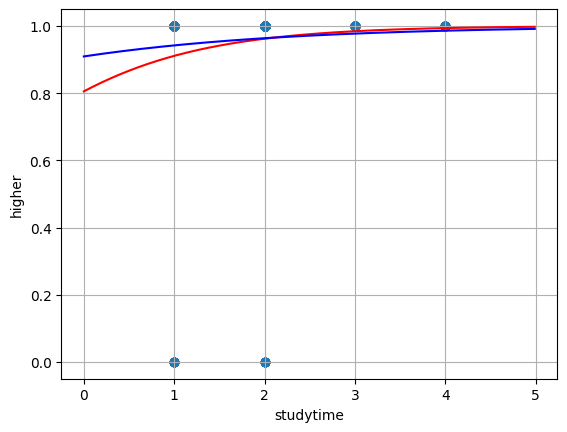

In [110]:
def HypothesisFunction(Coef,Inte,dX):
  dX=np.array(dX).reshape((-1,1))
  Coef=np.array(Coef).reshape((-1))
  return np.ones(dX.shape[0])/(np.ones(dX.shape[0])+np.exp(-(np.dot(dX,Coef)+np.full((dX.shape[0]),Inte))))

# Here is the data.
# How do I enforce a square grid in matplotlib? reference: https://stackoverflow.com/questions/50158333/how-do-i-enforce-a-square-grid-in-matplotlib
plt.grid()

# Add labels to the x- and y-axis.
plt.xlabel(ColX)
plt.ylabel(ColY)

# Data is plotted.
plt.scatter(df[ColX], df[ColY])

# Here is the hypothesis function a.k.a. prediction function.
xline = np.arange(0,5,0.01)
#yline = HypothesisFunction(HBiCon[1],HBiCon[0],xline)
yline = HypothesisFunction(skLGBi.coef_[0],skLGBi.intercept_,xline)

plt.plot(xline, HypothesisFunction(skLGBi.coef_[0],skLGBi.intercept_,xline), color='red')
plt.plot(xline, HypothesisFunction(HBiCon[1],HBiCon[0],xline), color='blue')
plt.show()

#print(EvaluationFunction(dfmain,ind_X,ind_Y,h0=h_i[0],h1=h_i[1]))

###[Unfinished] [Step 4B]: how to measure performance of logistic regression

In [112]:
def LogisR_DiffEvaluation(dX,dY,Coef,Inte):
  #print(dX.shape[0])
  #print(Coef)
  return [-(dY-HypothesisFunction(Coef,Inte,np.ones(dX.shape[0]))).mean(),-np.dot(dY-HypothesisFunction(Coef,Inte,dX),dX)]

print(LogisR_DiffEvaluation(TrX,TrY,skLGBi.coef_,skLGBi.intercept_))

[array([-0.04520008]), array([array([-0.90533844])], dtype=object)]


#[Unfinished] Binary Logistic Regression with discrete Input

###Step 2.1, Why Logistic Regression for continuous variables is not effective for discrete input variable?

**Initial variable**

Given that:
* $x\in\mathbb{Z},x\in[0,1]$
* $y\in\mathbb{Z},y\in[0,1]$


In [ ]:
ColX=BDisX[0]
ColY=BDisY[0]
df=dfBDis
TrX=TrXBDis
TrY=TrYBDis
TeX=TeXBDis
TeY=TeYBDis

In [ ]:
'''
ind_X=22
ind_Y=20
ColumnNameX=ColumnName[ind_X]
ColumnNameY=ColumnName[ind_Y]
dfmain=dfmain'''

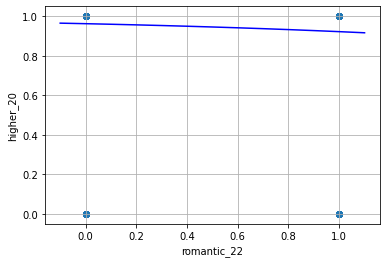

h_i[1] = [-0.7767415]
h_i[0] = [3.25426529]


'\nNote: I got h_i = [1.32865499 0.17638434]\n'

In [ ]:
from sklearn import linear_model

ind_X=22
ind_Y=20
ColumnNameX=ColumnName[ind_X]
ColumnNameY=ColumnName[ind_Y]
dfmain=dfmain

dfmain_X = np.stack(list(np.array(dfmain[ColumnNameX]))).reshape(-1)
dfmain_Y = np.stack(list(np.array(dfmain[ColumnNameY]))).reshape(-1)

logr = linear_model.LogisticRegression()
logr.fit(np.array(dfmain_X).reshape(-1,1),dfmain_Y)

predicted = logr.predict(np.array([-40]).reshape(-1,1))

def HypothesisFunction(x,logr):
  probability = 1 / (1 + np.exp(-(logr.coef_ * x + logr.intercept_)))
  '''
  Note:
  * logr.coef_ = h_i[1]
  * logr.intercept_ = h_i[0]
  '''
  return(probability.reshape(-1))

# [3.] Plot the Graph
plt.grid()

plt.xlabel(ColumnNameX)
plt.ylabel(ColumnNameY)
plt.scatter(dfmain[ColumnNameX], dfmain[ColumnNameY])
xline = np.arange(-0.1,1.1,0.1)
yline = HypothesisFunction(xline,logr)

plt.plot(xline, yline, color='blue')
plt.show()

print('h_i[1] = '+str(logr.coef_[0]))
print('h_i[0] = '+str(logr.intercept_))

'''
Note: I got h_i = [1.32865499 0.17638434]
'''

In [ ]:
FF = len(dfmain.loc[(dfmain[ColumnNameX] == 0)& (dfmain[ColumnNameY] == 0)])
FT = len(dfmain.loc[(dfmain[ColumnNameX] == 0)& (dfmain[ColumnNameY] == 1)])
TF = len(dfmain.loc[(dfmain[ColumnNameX] == 1)& (dfmain[ColumnNameY] == 0)])
TT = len(dfmain.loc[(dfmain[ColumnNameX] == 1)& (dfmain[ColumnNameY] == 1)])

print("FF = "+str(FF))
print("FT = "+str(FT))
print("TF = "+str(TF))
print("TT = "+str(TT))

FF = 9
FT = 254
TF = 11
TT = 121


###Step 2.2, Modify logistic regression for discrete input variable

In [ ]:
ind_X=20
ind_Y=32
ColumnNameX=ColumnName[ind_X]
ColumnNameY=ColumnName[ind_Y]
dfmain=dfmain

**What is T Test?**
* A statistical test that is used to compare the means of two groups.

**T Test Formula:** $y_{\text{test}}=\text{mean}_{0}*B_0+(\text{mean}_{1}-\text{mean}_{0})*B_1=\text{mean}_{0}*B_0+\Delta\text{mean}*B_1$

* $y_{\text{test}}=$ T Test result
* $\text{mean}_0=$ average value of $y$ when $x=0$
* $\text{mean}_1=$ average value of $y$ when $x=1$
* $B_0=$ coefficient that turn on $\text{mean}_{0}$
* $B_1=$ coefficient that turn off or on $\text{mean}_{1}$ depending on the data

**Note**
* The blue line = $\text{mean}_0$
* The red line = $\text{mean}_1=\text{mean}_0+\Delta\text{mean}*B_1$

**T Test in Matrix Form**
* The data can be represented as matrix
* $y_{\text{test}}=\begin{bmatrix}
\text{mean}_{0}*\vec{B_0} & (\text{mean}_{1}-\text{mean}_{0})*\vec{B_1}\\
\end{bmatrix}\in\mathbb{R}^{m\times2}$
* $\vec{B_0},\vec{B_1}\in\mathbb{R}^m,m=$ number of all data $\in\mathbb{Z}^+$

**Why doing this?**
* We are testing if $\text{mean}_{1}-\text{mean}_{0}=0$ or not?
* If $\text{mean}_{1}-\text{mean}_{0}=0\implies$ your data matches the null hypothesis and there are no irregularities found.
* null hypothesis = The hypothesis that there is no significant difference between specified populations, any observed difference being due to sampling or experimental error.

mean0 = 6.8
mean1 = 10.608


<ipython-input-40-b7982ba8884e>:23: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(line,(line/line)*dfmain.loc[dfmain[ColumnNameX] == 0, ColumnNameY].mean(),color='blue')
<ipython-input-40-b7982ba8884e>:25: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(line,(line/line)*dfmain.loc[dfmain[ColumnNameX] == 1, ColumnNameY].mean(),color='red')


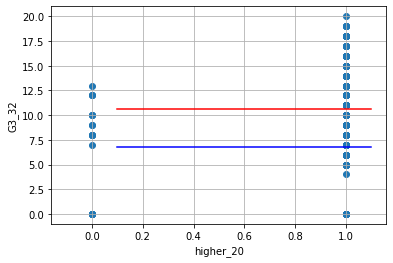

In [ ]:
def HypothesisFunction(x1,h0,h1):
  return 1/(1+np.exp(-(x1*h1+h0)))

def EvaluationFunction(data,ind_x,ind_y,h0=0,h1=0):
  num=0
  for i in range(data.shape[0]):
    num-=data.iat[i,ind_y]*np.emath.log(HypothesisFunction(data.iat[i,ind_x],h0,h1))+(1-data.iat[i,ind_y])*np.emath.log(1-HypothesisFunction(data.iat[i,ind_x],h0,h1))
  num*=(1/data.shape[0])
  return num

plt.grid()

# The Data
plt.xlabel(ColumnNameX)
plt.ylabel(ColumnNameY)
plt.scatter(dfmain[ColumnNameX], dfmain[ColumnNameY])

# The mean of the data
line=np.arange(-0.1,1.1,0.1)
mean0 = dfmain.loc[dfmain[ColumnNameX] == 0, ColumnNameY].mean()
mean1 = dfmain.loc[dfmain[ColumnNameX] == 1, ColumnNameY].mean()
print('mean0 = '+str(mean0))
plt.plot(line,(line/line)*dfmain.loc[dfmain[ColumnNameX] == 0, ColumnNameY].mean(),color='blue')
print('mean1 = '+str(mean1))
plt.plot(line,(line/line)*dfmain.loc[dfmain[ColumnNameX] == 1, ColumnNameY].mean(),color='red')

plt.show()

In [ ]:
yTEST = pd.DataFrame(
    data={
        #'mean0': list(np.stack(list(mean0*np.ones(dfmain[ColumnNameX].shape[0])))), 
        #'mean1-mean0': list(np.stack(list((mean1-mean0)*dfmain[ColumnNameX])).reshape(-1)),
        'result':list(np.stack(list(mean0+(mean1-mean0)*dfmain[ColumnNameX])).reshape(-1))
        }
        )
                         
print(yTEST)     

     result
0    10.608
1    10.608
2    10.608
3    10.608
4    10.608
..      ...
390  10.608
391  10.608
392  10.608
393  10.608
394  10.608

[395 rows x 1 columns]


**What is Odds?**

Odds provide a measure of the likelihood of a particular outcome.

* Odds $=\frac{\text{probability that the outcome occurs}}{\text{the probability that the outcome does not occur}}=\frac{p}{1-p}$
* Odds is not probability
* Probability $=\frac{\text{probability that the outcome occurs}}{\text{total outcome}}=p\in[0,1]$

**What is $\ln(\frac{p}{1-p})$ used for?**
* $\ln(\frac{p}{1-p})=\ln(\text{Odds})$
* $\ln()$ makes odds becomes symmetrical.

reference: https://youtu.be/ARfXDSkQf1Y

**How to apply T Test with logistic regression formula that have discrete input variable?**

Given that:
* $y_{\text{test}}=$ T Test result

**The logistic regression formula with discrete input variable:** 
$y_{\text{test}}=B_1*\ln(\frac{F_T}{F_F})+B_2*(\ln(\frac{T_T}{T_F})-\ln(\frac{F_T}{F_F}))$
* $y_{\text{test}}=$ The Test that indicate the relationship between input and output variable.
* $F=0=$ False, $T=1=$ True
* $F_F=$ number of all $\vec{v}$ that $\begin{bmatrix} 0& 0 \end{bmatrix}$
* $F_T=$ number of all $\vec{v}$ that $\begin{bmatrix} 0& 1 \end{bmatrix}$
* $T_F=$ number of all $\vec{v}$ that $\begin{bmatrix} 1& 0 \end{bmatrix}$
* $T_T=$ number of all $\vec{v}$ that $\begin{bmatrix} 1& 1 \end{bmatrix}$
* $B_0=$ coefficient that turn on $\ln(\frac{F_T}{F_F})$
* $B_1=$ coefficient that turn off or on $(\ln(\frac{T_T}{T_F})-\ln(\frac{F_T}{F_F}))$ depending on the data

**Why $\ln(...)$?**
* $\ln(...)=\ln(\frac{p}{1-p})=\ln(\text{Odds})$

In [ ]:
ind_X=22
ind_Y=20
ColumnNameX=ColumnName[ind_X]
ColumnNameY=ColumnName[ind_Y]
dfmain=dfmain

In [ ]:
FF = len(dfmain.loc[(dfmain[ColumnNameX] == 0)& (dfmain[ColumnNameY] == 0)])
FT = len(dfmain.loc[(dfmain[ColumnNameX] == 0)& (dfmain[ColumnNameY] == 1)])
TF = len(dfmain.loc[(dfmain[ColumnNameX] == 1)& (dfmain[ColumnNameY] == 0)])
TT = len(dfmain.loc[(dfmain[ColumnNameX] == 1)& (dfmain[ColumnNameY] == 1)])

print("FF = "+str(FF))
print("FT = "+str(FT))
print("TF = "+str(TF))
print("TT = "+str(TT))
# reference: https://stackoverflow.com/questions/17322109/get-dataframe-row-count-based-on-conditions

yTEST = pd.DataFrame(
    data={
        'X Variable':list(dfmain[ColumnNameX]),
        'Y Variable':list(dfmain[ColumnNameY]),
        'result':list(np.log((FT)/(FF))+(np.log((TT)/(TF))-np.log((FT)/(FF)))*dfmain[ColumnNameX])
        }
        )

print('np.log((FT)/(FF)) = '+str(np.log((FT)/(FF))))
print('np.log((TT)/(TF))-np.log((FT)/(FF)) = '+str(np.log((TT)/(TF))-np.log((FT)/(FF))))
print(yTEST)

FF = 9
FT = 254
TF = 11
TT = 121
np.log((FT)/(FF)) = 3.340109689682317
np.log((TT)/(TF))-np.log((FT)/(FF)) = -0.9422144168839464
    X Variable Y Variable                result
0          [0]        [1]   [3.340109689682317]
1          [0]        [1]   [3.340109689682317]
2          [0]        [1]   [3.340109689682317]
3          [1]        [1]  [2.3978952727983707]
4          [0]        [1]   [3.340109689682317]
..         ...        ...                   ...
390        [0]        [1]   [3.340109689682317]
391        [0]        [1]   [3.340109689682317]
392        [0]        [1]   [3.340109689682317]
393        [0]        [1]   [3.340109689682317]
394        [0]        [1]   [3.340109689682317]

[395 rows x 3 columns]


#Multinomial logistic regression

#Ordinal logistic regression